<a href="https://colab.research.google.com/github/ian-espejo/TimeSeriesPython/blob/main/Series_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance

data = yfinance.download(tickers='^GSPC, ^FTSE, ^N225 ^GDAXI',
                         start='1994-01-07',
                         end='2021-05-31',
                         interval='1d',
                         group_by='ticker',
                         auto_adjust=True)

[*********************100%***********************]  4 of 4 completed


In [2]:
data['ftse'] = data['^FTSE'].Close[:]
data['dax'] = data['^GDAXI'].Close[:]
data['spx'] = data['^GSPC'].Close[:]
data['nikkei'] = data['^N225'].Close[:]
del data['^FTSE']
del data['^GDAXI']
del data['^GSPC']
del data['^N225']
data = data.asfreq('b')
data = data.fillna(method='ffill')
data['market_value'] = data.ftse
data['ret_ftse'] = data.ftse.pct_change(1)*100
data['ret_dax'] = data.dax.pct_change(1)*100
data['ret_spx'] = data.spx.pct_change(1)*100
data['ret_nikkei'] = data.nikkei.pct_change(1)*100
size = int(len(data)*0.8)
data, data_test = data.iloc[:size], data.iloc[size:]
data.head()

,ftse,dax,spx,nikkei,market_value,ret_ftse,ret_dax,ret_spx,ret_nikkei
,,,,,,,,,
Date,,,,,,,,,
1994-01-07,3446.000000,2224.949951,469.899994,18124.009766,3446.000000,NaN,NaN,NaN,NaN
1994-01-10,3440.600098,2225.000000,475.269989,18443.439453,3440.600098,-0.156701,0.002249,1.142795,1.762467
1994-01-11,3413.800049,2228.100098,474.130005,18485.250000,3413.800049,-0.778935,0.139330,-0.239860,0.226696
1994-01-12,3372.000000,2182.060059,474.170013,18793.880859,3372.000000,-1.224443,-2.066336,0.008438,1.669606
1994-01-13,3360.000000,2142.370117,472.470001,18577.259766,3360.000000,-0.355872,-1.818921,-0.358524,-1.152615


In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.6 MB/s eta 0:00:00


In [4]:
from pmdarima.arima import auto_arima

model = auto_arima(data.market_value)
model

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5716
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -31373.107
Date:                Wed, 21 Jun 2023   AIC                          62760.215
Time:                        12:02:26   BIC                          62806.771
Sample:                    01-07-1994   HQIC                         62776.422
                         - 12-04-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1313      0.072     -1.819      0.069      -0.273       0.010
ar.L2         -0.2734      0.057     -4.796      0.000      -0.385      -0.162
ar.L3          0.6070      0.066      9.190      0.0

In [6]:
model_auto = auto_arima(data.ret_ftse[1:])

In [7]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5715
Model:               SARIMAX(5, 0, 2)   Log Likelihood               -8822.032
Date:                Wed, 21 Jun 2023   AIC                          17660.064
Time:                        12:04:21   BIC                          17713.270
Sample:                    01-10-1994   HQIC                         17678.586
                         - 12-04-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3232      0.080      4.039      0.000       0.166       0.480
ar.L2         -0.4456      0.081     -5.480      0.000      -0.605      -0.286
ar.L3         -0.0692      0.010     -6.885      0.000      -0.089      -0.050
ar.L4          0.0446      0.009      4.726      0.000       0.026       0.063
ar.L5         -0.1016      0.008    -12.081      0.000      -0.118      -0.085
ma.L1         -0.3459      0.080     -4.329      0.000      -0.503      -0.189
ma.L2          0.4059      0.083      4.905      0.000       0.244       0.568
sigma2         1.2833      0.013    100.111      0.000       1.258       1.308
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7633.82
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
#model_auto_2 = auto_arima(data.ret_ftse[1:],
#                          exogenous=data[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
#                          m=5, #ciclo estacional (seasonal)
#                          max_order=None, #cant de vars a usar en la reg
#                          max_p=7, #comp AR
#                          max_q=7, #comp MA
#                          max_d=2, #comp integraciones
#                          max_P=4,
#                          max_Q=4,
#                          max_D=2,
#                          maxiter=50, #iteraciones
#                          alpha=0.05,
#                          n_jobs=-1, #modelos a calzar al mismo tiempo
#                          trend='ct',
#                          information_criterion='oob',
#                          out_of_sample_size=int(len(data)*0.2)) #valida la seleccion del modelo

In [9]:
#model_auto_2.summary()

In [10]:
#SARIMA componente estacional

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data.ret_ftse[1:],
                order=(1,0,1),
                seasonal_order=(1,0,1,5)) #el 5 es cada cuantos dias se repite la estacionalidad
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                     
Dep. Variable:                          ret_ftse   No. Observations:                 5715
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 5)   Log Likelihood               -8845.078
Date:                           Wed, 21 Jun 2023   AIC                          17700.155
Time:                                   12:04:23   BIC                          17733.410
Sample:                               01-10-1994   HQIC                         17711.732
                                    - 12-04-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7030      0.068     10.312      0.000       0.569       0.837
ma.L1         -0.7474      0.063    -11.809

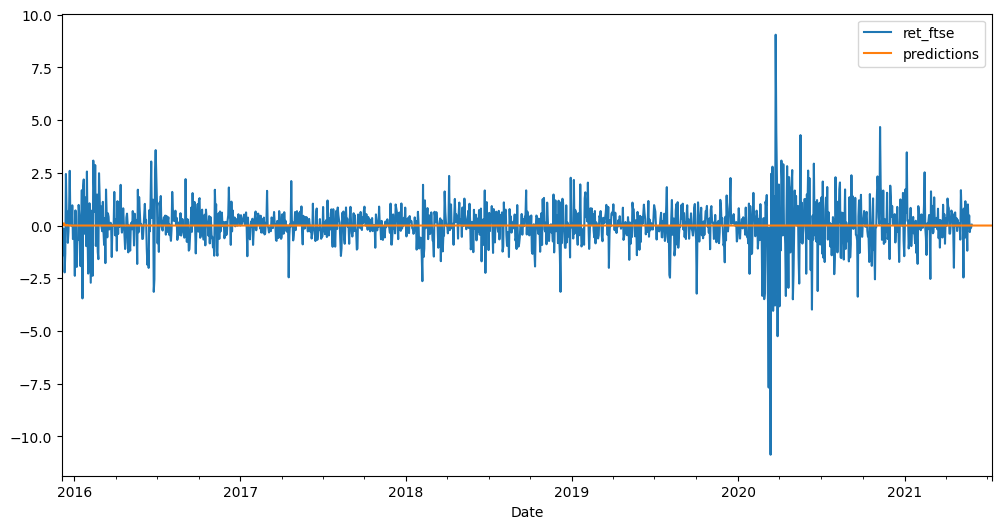

In [11]:
#prediccion

predictions = results.predict(start=len(data),
                              end=len(data)+len(data_test)+30).rename('predictions')

ax = data_test.ret_ftse.plot(legend=True,
                             figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)

In [12]:
model2 = SARIMAX(data.market_value,
                 exog=data.spx,
                 order = (1,1,3),
                 seasonal_order = (2,0,1,5))
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        market_value   No. Observations:                 5716
Model:             SARIMAX(1, 1, 3)x(2, 0, [1], 5)   Log Likelihood              -30323.356
Date:                             Wed, 21 Jun 2023   AIC                          60664.711
Time:                                     12:04:36   BIC                          60724.569
Sample:                                 01-07-1994   HQIC                         60685.549
                                      - 12-04-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6234      0.033     79.790      0.000       2.559       2.688
ar.L1         -0.3321      0.127     -2.611      0.009      -0.581      -0.083
ma.L1          0.0451      0.126      0.358      0.721      -0.202       0.292
ma.L2         -0.1269      0.038     -3.312      0.001      -0.202      -0.052
ma.L3         -0.0773      0.010     -7.629      0.000      -0.097      -0.057
ar.S.L5        0.6178      0.292      2.114      0.035       0.045       1.191
ar.S.L10      -0.0040      0.015     -0.265      0.791      -0.034       0.026
ma.S.L5       -0.6374      0.292     -2.180      0.029      -1.210      -0.064
sigma2      2377.9375     26.341     90.274      0.000    2326.309    2429.566
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4346.71
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.51
Prob(H) (two-sided):                  0.86   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
import pandas as pd

df = pd.read_csv('/content/co2.csv')

df['date'] = pd.to_datetime(dict(year = df['year'],
                                 month = df['month'],
                                 day = 1))
df.set_index('date', inplace = True)
df.index.freq = 'MS'
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


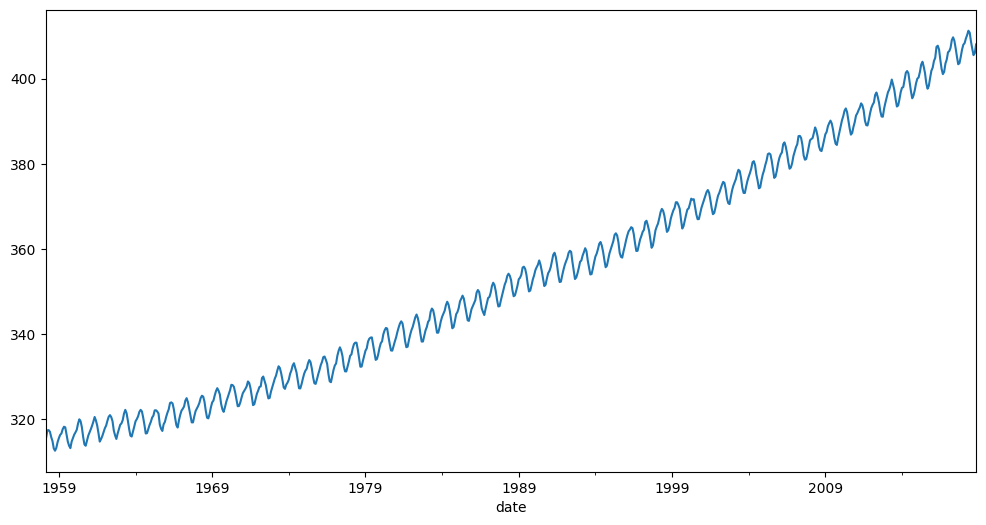

In [14]:
ax = df['interpolated'].plot(figsize=(12,6))
ax.autoscale(axis='x', tight = True)

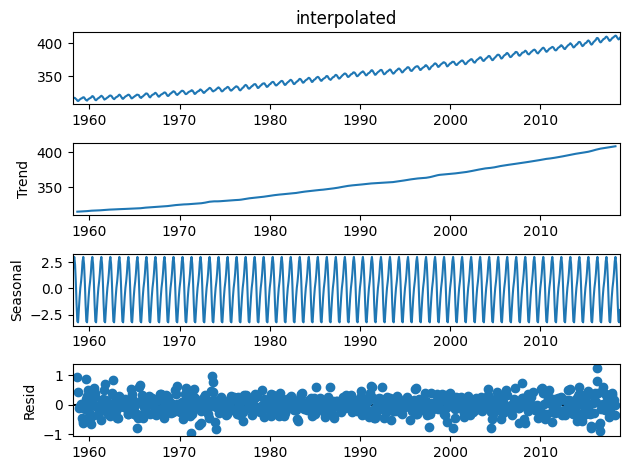

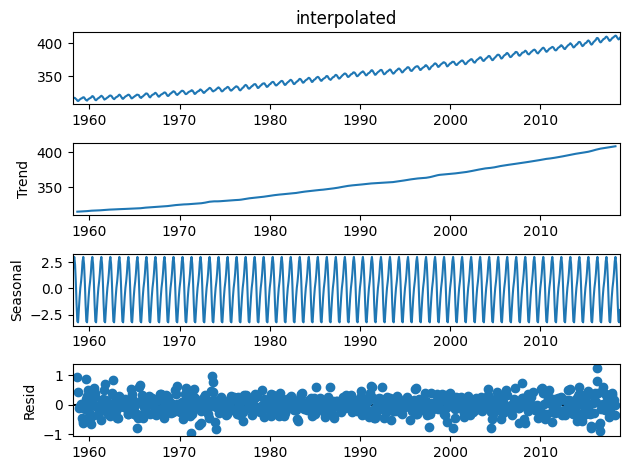

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['interpolated'], model = 'add')
result.plot()

In [16]:
train = df.iloc[:717]
test = df.iloc[717:]

model = SARIMAX(train['interpolated'],
                order = (0,1,1),
                seasonal_order = (1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.166
Date:                            Wed, 21 Jun 2023   AIC                            418.332
Time:                                    12:04:39   BIC                            436.627
Sample:                                03-01-1958   HQIC                           425.397
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3715      0.032    -11.660      0.000      -0.434      -0.309
ar.S.L12       0.9997      0.000   3480.518      0.000       0.999       1.000
ma.S.L12      -0.8661      0.022    -38.823      0.000      -0.910      -0.822
sigma2         0.0961      0.005     20.183      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 3.88
Prob(Q):                              0.70   Prob(JB):                         0.14
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
predictions = results.predict(start = len(train),
                              end = len(train)+len(test)-1).rename('predictions')

for i in range(len(predictions)):
  print(f'predicted={predictions[i]:<11.10}, expected={test.interpolated[i]}')

predicted=406.5834619, expected=406.81
predicted=407.7857019, expected=407.96
predicted=408.5315973, expected=408.32
predicted=409.4370057, expected=409.41
predicted=410.9942734, expected=410.24
predicted=411.5976078, expected=411.24
predicted=410.8174358, expected=410.79
predicted=409.1267217, expected=408.71
predicted=407.0255392, expected=406.99
predicted=405.5746841, expected=405.51
predicted=405.8451446, expected=406.0
predicted=407.37935  , expected=408.02


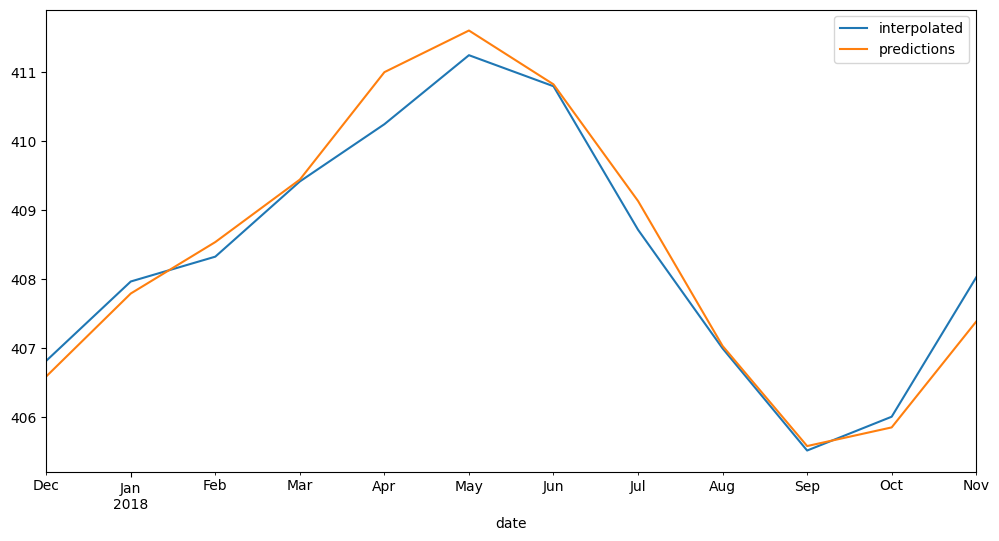

In [18]:
ax = test.interpolated.plot(legend=True,
                            figsize=(12,6))
predictions.plot(legend = True)
ax.autoscale(axis='x', tight=True)

<Axes: xlabel='date'>

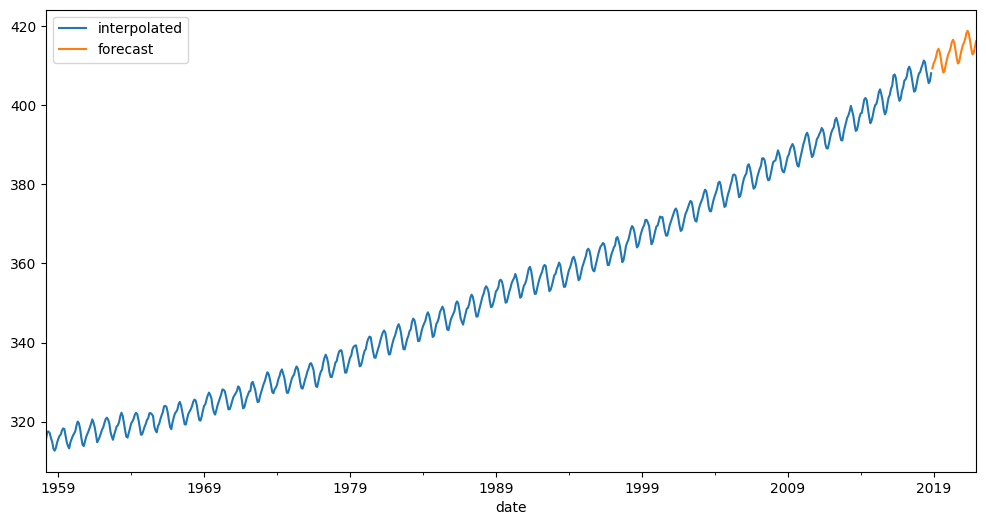

In [19]:
model = SARIMAX(df['interpolated'],
                order = (0,1,1),
                seasonal_order = (1,0,1,12))
results = model.fit()
fcast = results.predict(len(df), len(df)+36).rename('forecast')

ax = df.interpolated.plot(legend=True,
                          figsize=(12,6))
fcast.plot(legend=True)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/airline_passengers.csv',
              index_col='Month',
              parse_dates=True)

df.dropna(inplace=True)
df.index
df.index.freq = 'MS'
df.index
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
#tecnicas de suavisamiento

df['6-month-SMA'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['12-month-SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()

df.head(20)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


<Axes: xlabel='Month'>

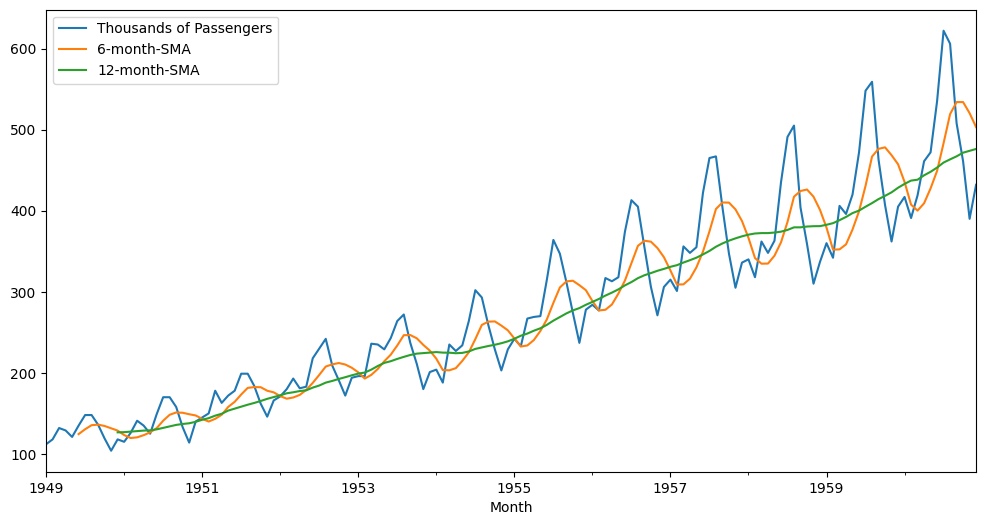

In [22]:
df.plot(figsize=(12,6))

<Axes: xlabel='Month'>

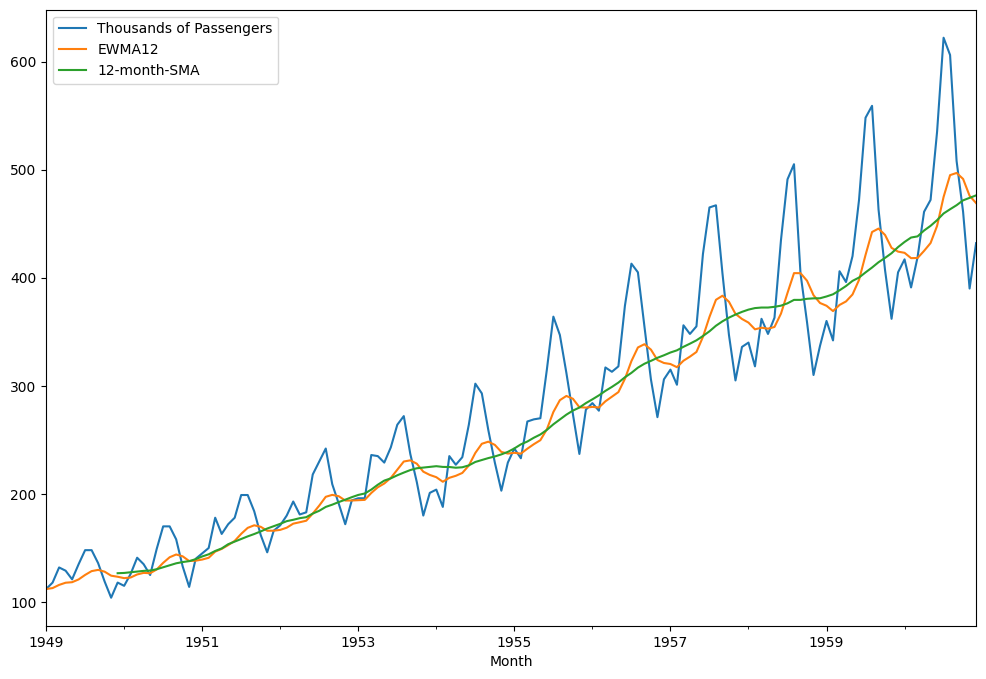

In [23]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(span=12,
                                                 adjust=False).mean()

df[['Thousands of Passengers', 'EWMA12', '12-month-SMA']].plot(figsize=(12,8))

In [24]:
#suavizado exponencial

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#METODOS EQUIVALENTES:
span = 12
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=2/(span+1),
                                                 adjust=False).mean()
df['SES12'] = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=2/(span+1),
                                                                    optimized=False).fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,112.923077,112.923077
1949-03-01,132,NaN,NaN,115.857988,115.857988
1949-04-01,129,NaN,NaN,117.879836,117.879836
1949-05-01,121,NaN,NaN,118.359861,118.359861


In [25]:
#suavizamiento exponencial doble

from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],
                                      trend='add').fit().fittedvalues.shift(-1) #'mul'
df.head()


,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12
Month,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.102394
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.040657
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.001539
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.085845
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.110263


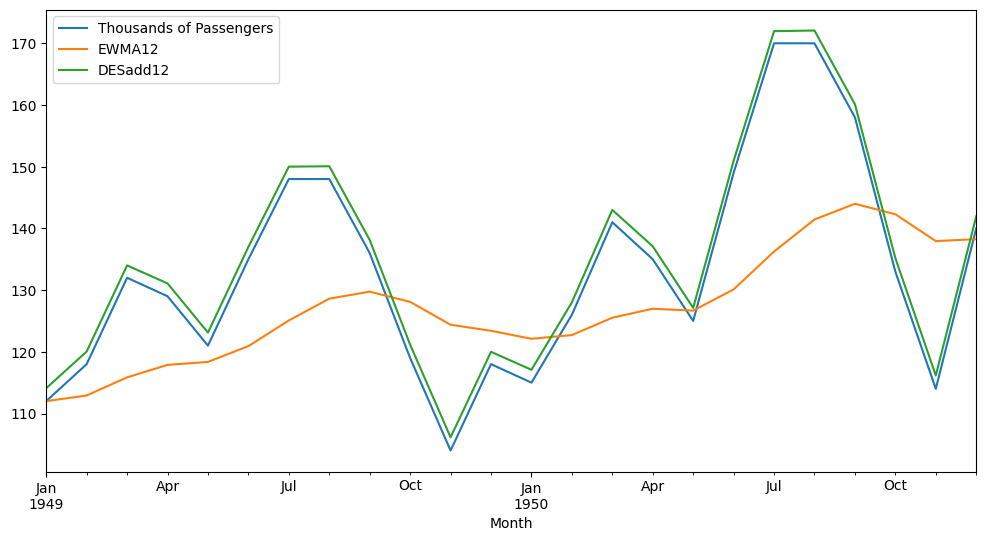

In [26]:
df[['Thousands of Passengers', 'EWMA12', 'DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x', tight=True)

In [27]:
#suavizamiento exponencial triple

df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],
                                      trend='mul', #add
                                      seasonal='mul', #add
                                      seasonal_periods=12).fit().fittedvalues.shift(-1)

df.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.102394,118.842606
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.040657,133.333853
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.001539,127.899963
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.085845,120.979016
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.110263,133.905554


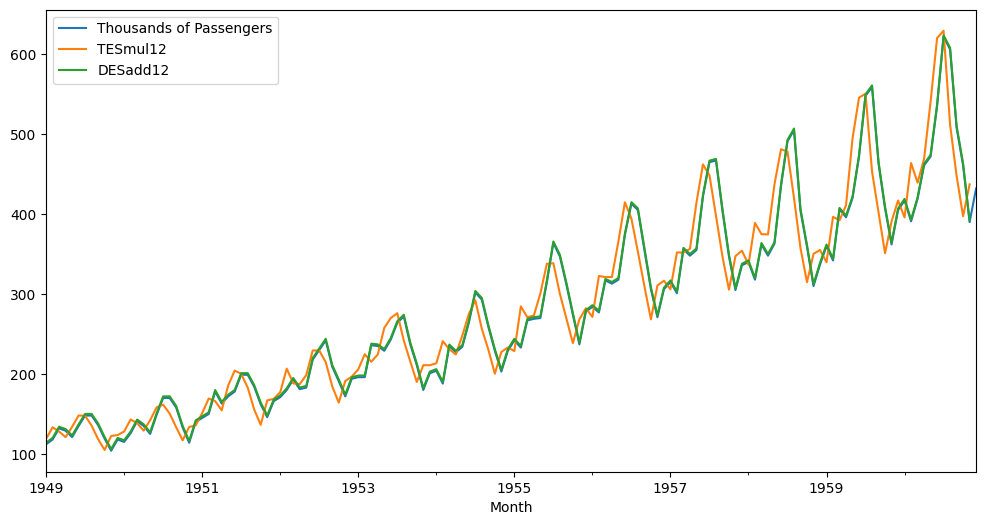

In [28]:
df[['Thousands of Passengers', 'TESmul12', 'DESadd12']].plot(figsize=(12,6)).autoscale(axis='x', tight=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


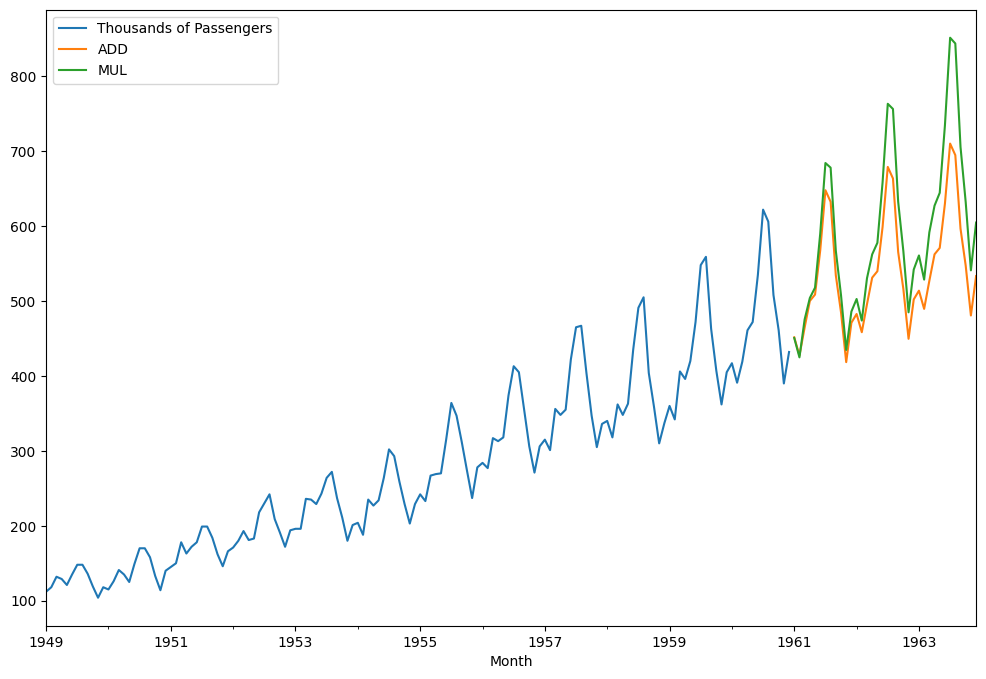

In [29]:
model_add = ExponentialSmoothing(df['Thousands of Passengers'],
                                 trend='add',
                                 seasonal='add',
                                 seasonal_periods=12).fit()

model_mul = ExponentialSmoothing(df['Thousands of Passengers'],
                                 trend='mul',
                                 seasonal='mul',
                                 seasonal_periods=12).fit()

forecast_add = model_add.forecast(36)
forecast_mul = model_mul.forecast(36)

df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_add.plot(label='ADD')
forecast_mul.plot(label='MUL')
plt.legend(loc='upper left')

In [30]:
df = yfinance.download(tickers='^GSPC, ^FTSE, ^N225 ^GDAXI',
                         start='1994-01-07',
                         end='2021-05-31',
                         interval='1d',
                         group_by='ticker',
                         auto_adjust=True)

df['ftse'] = df['^FTSE'].Close[:]
df['dax'] = df['^GDAXI'].Close[:]
df['spx'] = df['^GSPC'].Close[:]
df['nikkei'] = df['^N225'].Close[:]
del df['^FTSE']
del df['^GDAXI']
del df['^GSPC']
del df['^N225']
df = df.asfreq('b')
df = df.fillna(method='ffill')
df['market_value'] = df.ftse
df['ret_ftse'] = df.ftse.pct_change(1)*100
df['ret_dax'] = df.dax.pct_change(1)*100
df['ret_spx'] = df.spx.pct_change(1)*100
df['ret_nikkei'] = df.nikkei.pct_change(1)*100
size = int(len(df)*0.8)
df_train, df_test = df.iloc[:size], df.iloc[size:]
df.head()

[*********************100%***********************]  4 of 4 completed


,ftse,dax,spx,nikkei,market_value,ret_ftse,ret_dax,ret_spx,ret_nikkei
,,,,,,,,,
Date,,,,,,,,,
1994-01-07,3446.000000,2224.949951,469.899994,18124.009766,3446.000000,NaN,NaN,NaN,NaN
1994-01-10,3440.600098,2225.000000,475.269989,18443.439453,3440.600098,-0.156701,0.002249,1.142795,1.762467
1994-01-11,3413.800049,2228.100098,474.130005,18485.250000,3413.800049,-0.778935,0.139330,-0.239860,0.226696
1994-01-12,3372.000000,2182.060059,474.170013,18793.880859,3372.000000,-1.224443,-2.066336,0.008438,1.669606
1994-01-13,3360.000000,2142.370117,472.470001,18577.259766,3360.000000,-0.355872,-1.818921,-0.358524,-1.152615


In [31]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.ret_ftse[1:], test='pp')

#como se obtiene 0 quiere decir que la serie ya es estacionaria

0

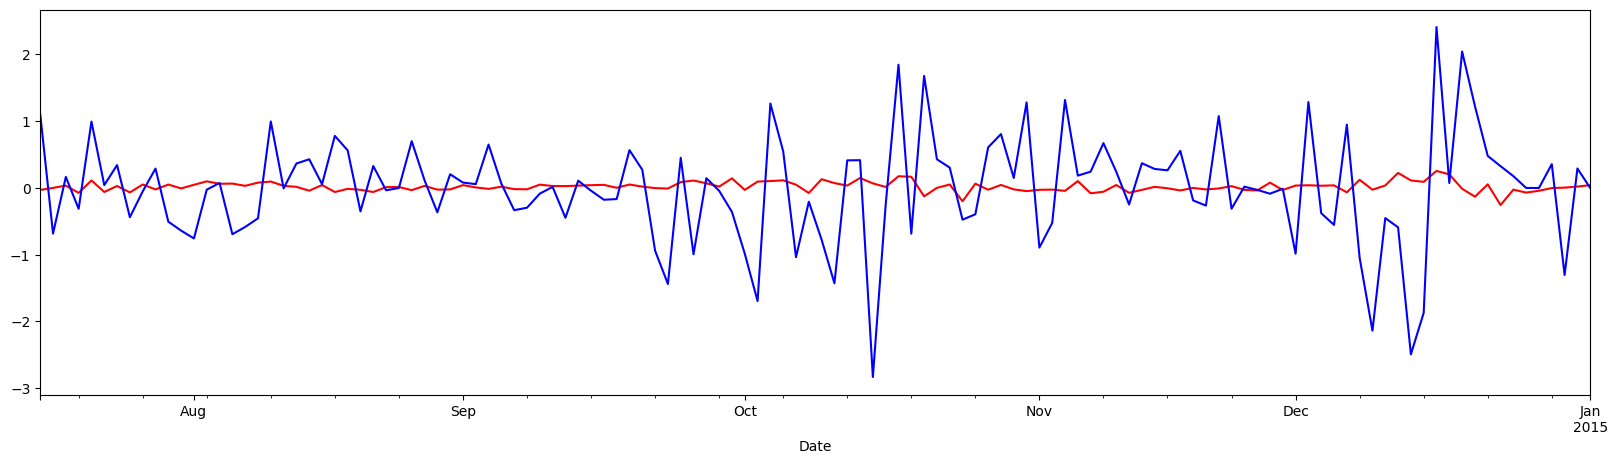

In [32]:
#MODELO AUTOREGRESIVO

from statsmodels.tsa.arima.model import ARIMA
model_ret_ar = ARIMA(df.ret_ftse[1:], order=(5,0,0))
results_ret_ar = model_ret_ar.fit()

start_date = '2014-07-16'
end_date = '2015-01-01'
df_pred_ar = results_ret_ar.predict(start = start_date,
                                    end = end_date)

df_pred_ar[start_date:end_date].plot(figsize=(20,5), color='red')
df.ret_ftse[start_date:end_date].plot(color='blue')
plt.show()

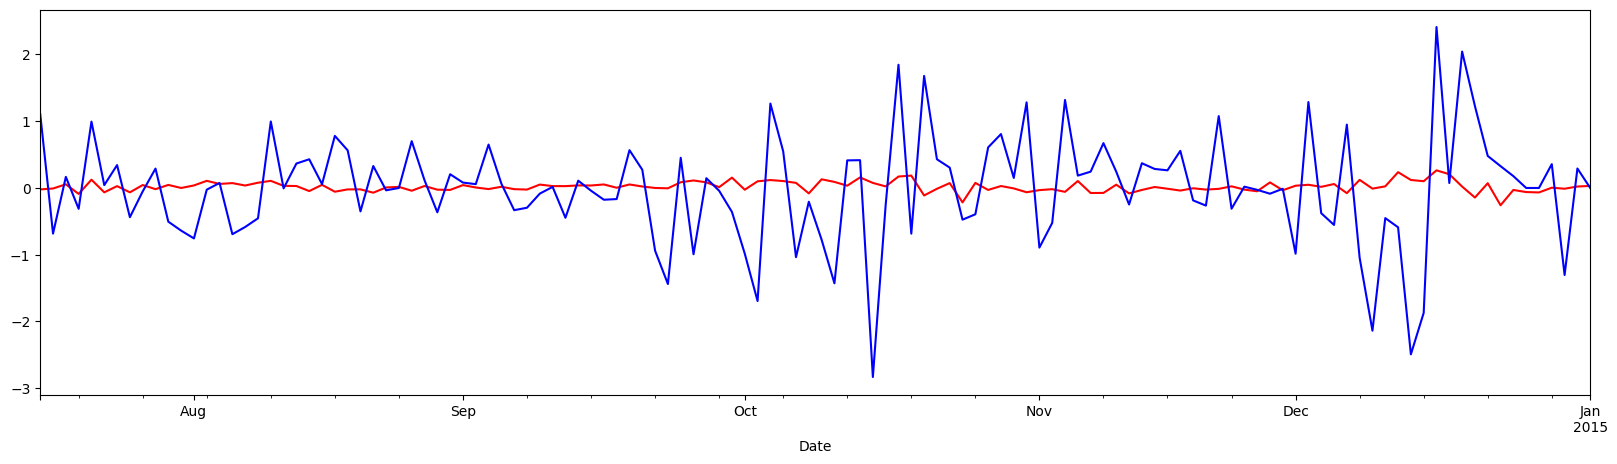

In [33]:
#MODELO MEDIAS MOVILES

model_ret_ma = ARIMA(df.ret_ftse[1:], order=(0,0,5))
results_ret_ma = model_ret_ma.fit()
df_pred_ma = results_ret_ma.predict(start = start_date,
                                    end = end_date)

df_pred_ma[start_date:end_date].plot(figsize=(20,5), color='red')
df.ret_ftse[start_date:end_date].plot(color='blue')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


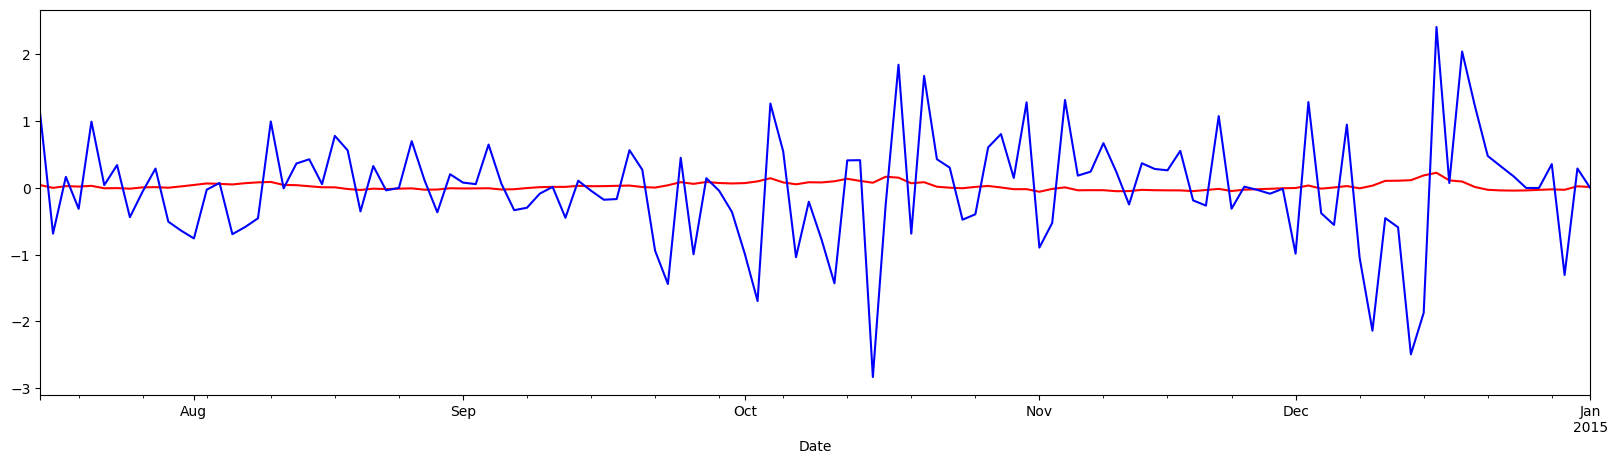

In [34]:
#MODELO ARMA
#en este caso no hay que hacer diferencias estacionarias (I) porque la serie ya es estacionaria

model_ret_arma = ARIMA(df.ret_ftse[1:], order=(1,0,1))
results_ret_arma = model_ret_arma.fit()
df_pred_arma = results_ret_arma.predict(start = start_date,
                                        end = end_date)

df_pred_arma[start_date:end_date].plot(figsize=(20,5), color='red')
df.ret_ftse[start_date:end_date].plot(color='blue')
plt.show()

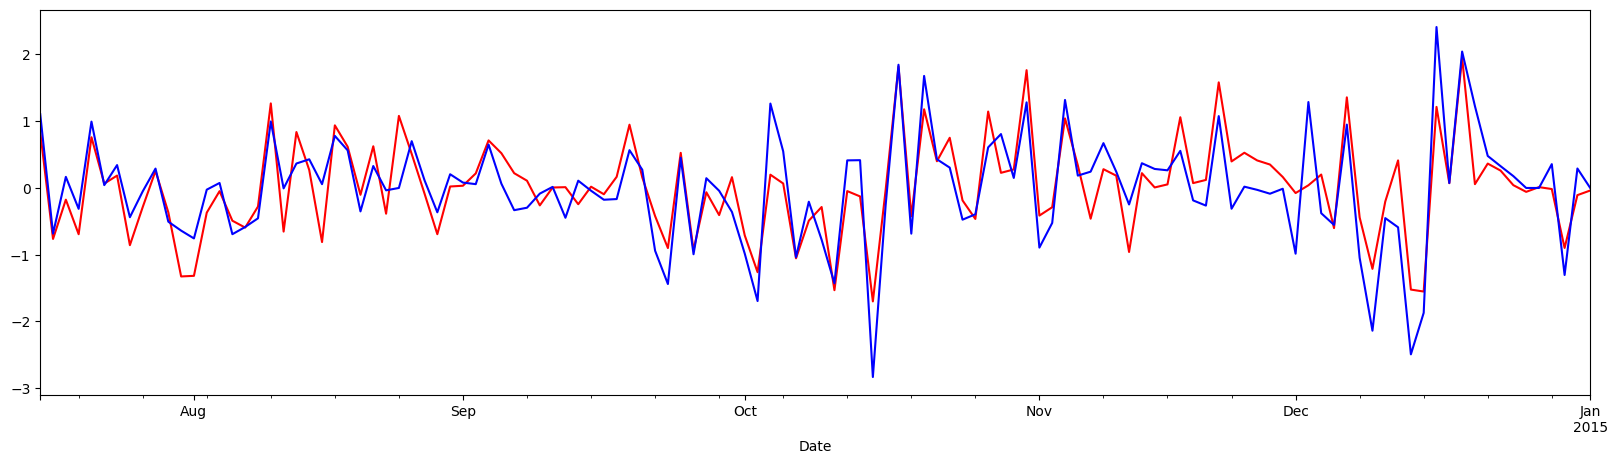

In [35]:
#MODELO ARIMAX

model_ret_armax = ARIMA(df.ret_ftse[1:], exog=df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:], order=(1,0,1))
results_ret_armax = model_ret_armax.fit()
df_pred_armax = results_ret_armax.predict(start = start_date,
                                          end = end_date,
                                          exog=df[['ret_spx', 'ret_dax', 'ret_nikkei']][start_date:end_date])

df_pred_armax[start_date:end_date].plot(figsize=(20,5), color='red')
df.ret_ftse[start_date:end_date].plot(color='blue')
plt.show()

In [36]:
from pmdarima.arima.utils import nsdiffs

nsdiffs(df.ret_ftse[1:], test='ch', m=5)

#0 indica que la serie no tiene estacionalidad

0

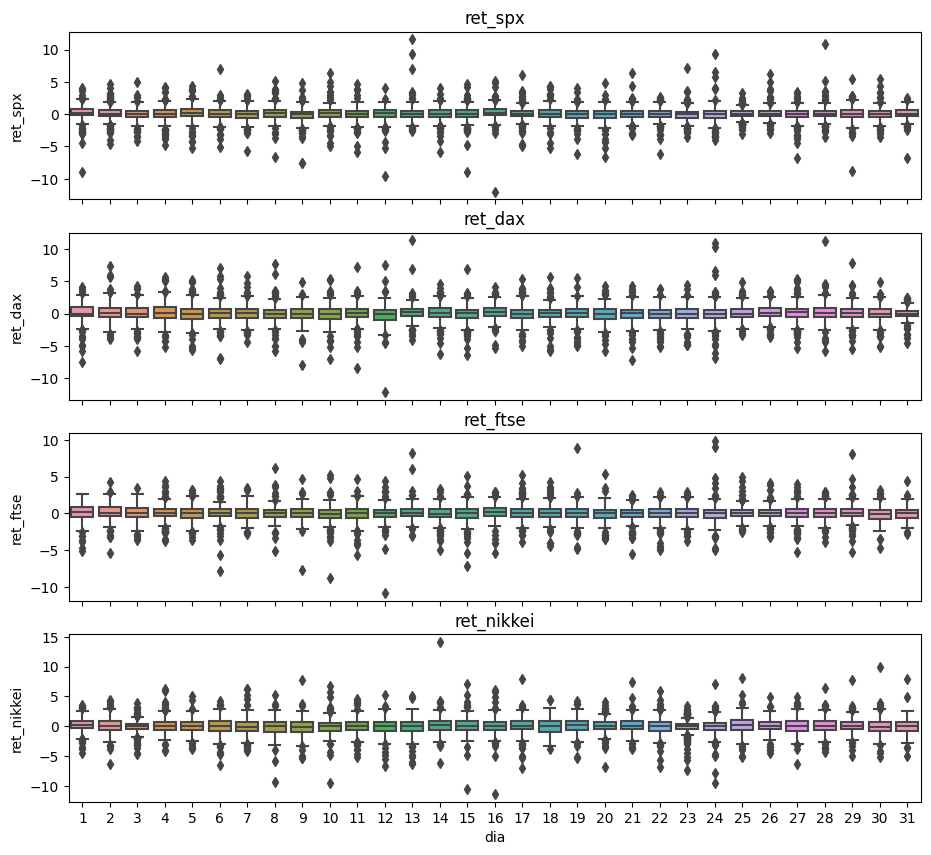

In [37]:
import seaborn as sn

df['dia'] = df.index.day
df['mes'] = df.index.month

#otra forma de ver estacionalidad

fig, ejes = plt.subplots(4, 1, figsize=(11,10), sharex=True)
for nombre, eje in zip(['ret_spx', 'ret_dax', 'ret_ftse', 'ret_nikkei'], ejes):
  sn.boxplot(data=df, x='dia', y=nombre, ax=eje)
  eje.set_title(nombre)
  if eje != ejes[-1]:
    eje.set_xlabel('')

<Axes: xlabel='mes', ylabel='ret_ftse'>

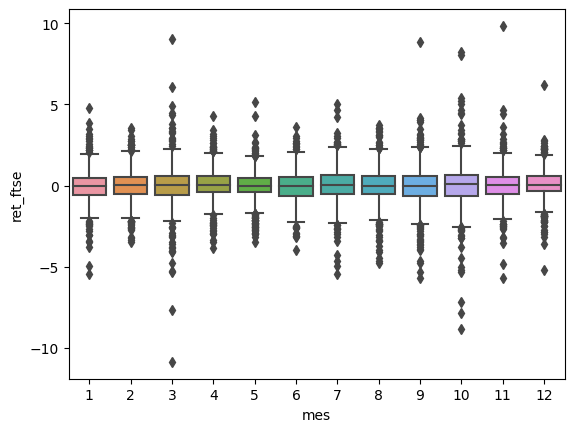

In [38]:
sn.boxplot(data=df,
           x='mes',
           y='ret_ftse')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


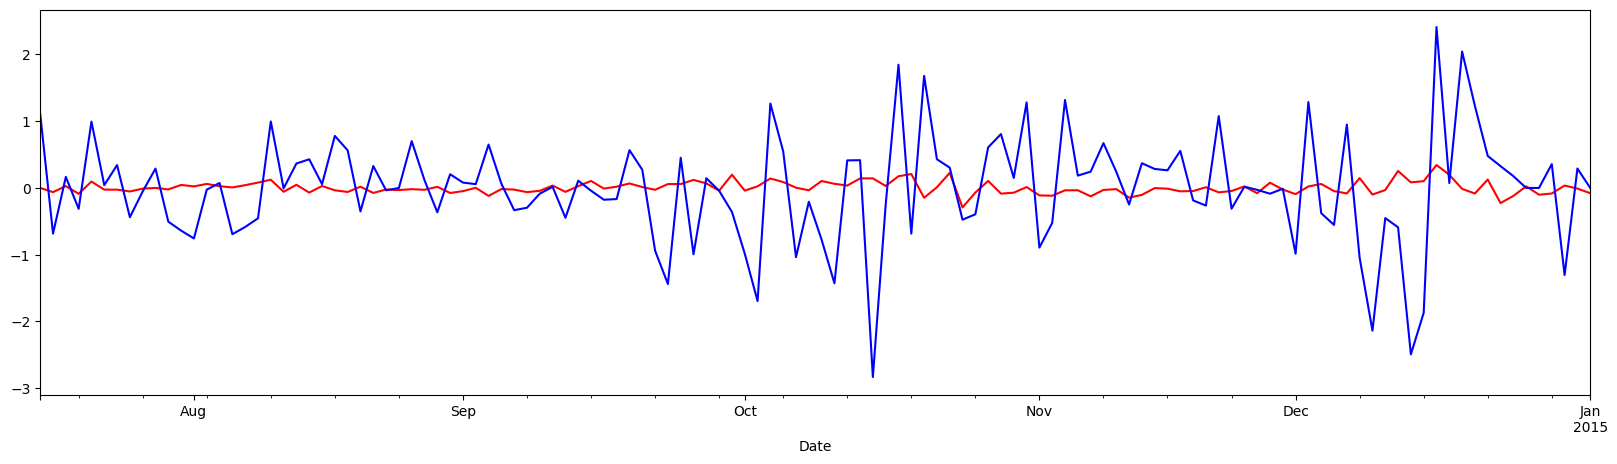

In [39]:
#MODELO SARIMA

model_ret_sarma = SARIMAX(df.ret_ftse[1:], order=(3,0,4), seasonal_order=(3,0,2,5))
results_ret_sarma = model_ret_sarma.fit()
df_pred_sarma = results_ret_sarma.predict(start = start_date,
                                          end = end_date)

df_pred_sarma[start_date:end_date].plot(figsize=(20,5), color='red')
df.ret_ftse[start_date:end_date].plot(color='blue')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


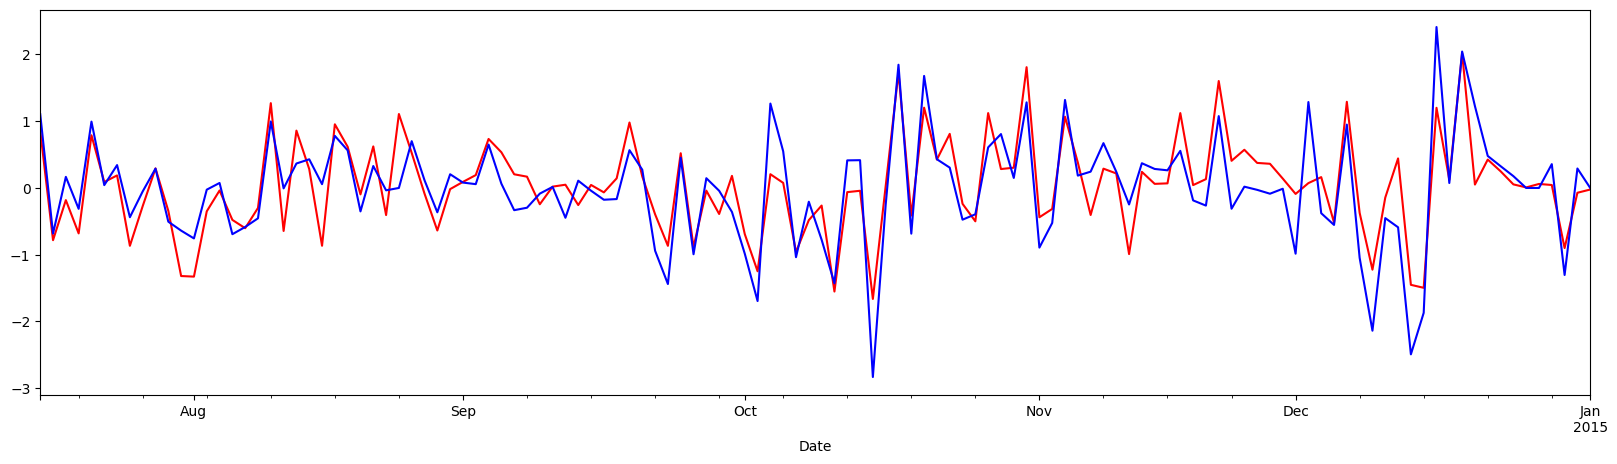

In [40]:
#MODELO SARIMAX

model_ret_sarimax = SARIMAX(df.ret_ftse[1:],
                            exog=df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                            order=(3,0,4),
                            seasonal_order=(3,0,2,5))
results_ret_sarimax = model_ret_sarimax.fit()
df_pred_sarimax = results_ret_sarimax.predict(start = start_date,
                                          end = end_date,
                                          exog=df[['ret_spx', 'ret_dax', 'ret_nikkei']][start_date:end_date])

df_pred_sarimax[start_date:end_date].plot(figsize=(20,5), color='red')
df.ret_ftse[start_date:end_date].plot(color='blue')
plt.show()

In [41]:
#model_auto = auto_arima(df.ret_ftse[1:],
#                        exogenous=df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
#                        m=5,
#                        max_p=3,
#                        max_q=3,
#                        max_P=3,
#                        max_Q=3)

In [42]:
#df_auto_pred = pd.DataFrame(model_auto.predict(n_periods=len(df[start_date:end_date]),
#                                               exogenous=df[['ret_spx', 'ret_dax', 'ret_nikkei']][start_date:end_date]),
#                                               index=df[start_date:end_date].index)

#df_auto_pred.plot(figsize=(20,5), color='red')
#df.ret_ftse[start_date:end_date].plot(color='blue')
#plt.show()

In [46]:
#!pip install arch
from arch import arch_model

mod_garch = arch_model(df.ret_ftse[1:],
                       vol='GARCH',
                       p=1,
                       q=1,
                       mean='constant',
                       dist='Normal')
res_garch=mod_garch.fit(last_obs=start_date,
                        update_freq=10)

Iteration:     10,   Func. Count:     65,   Neg. LLF: 7311.398843437495
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7311.39883405858
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12


/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


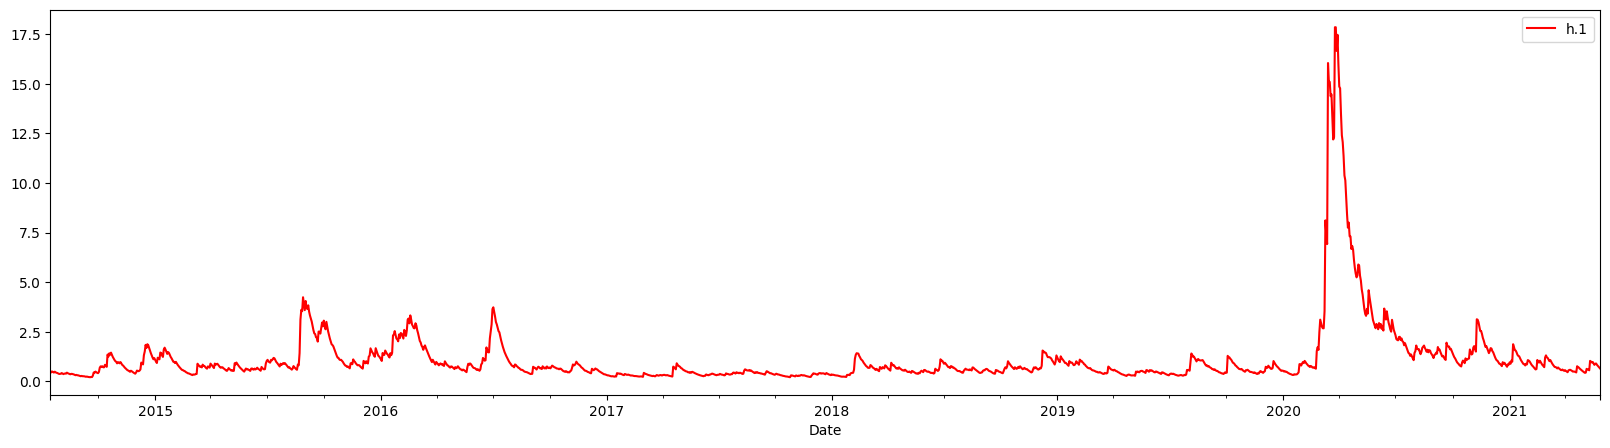

In [48]:
pred_garch = res_garch.forecast(horizon=1,
                                align='target')

pred_garch.residual_variance[start_date:].plot(figsize=(20,5),
                                               color='red',
                                               zorder=2)
plt.show()

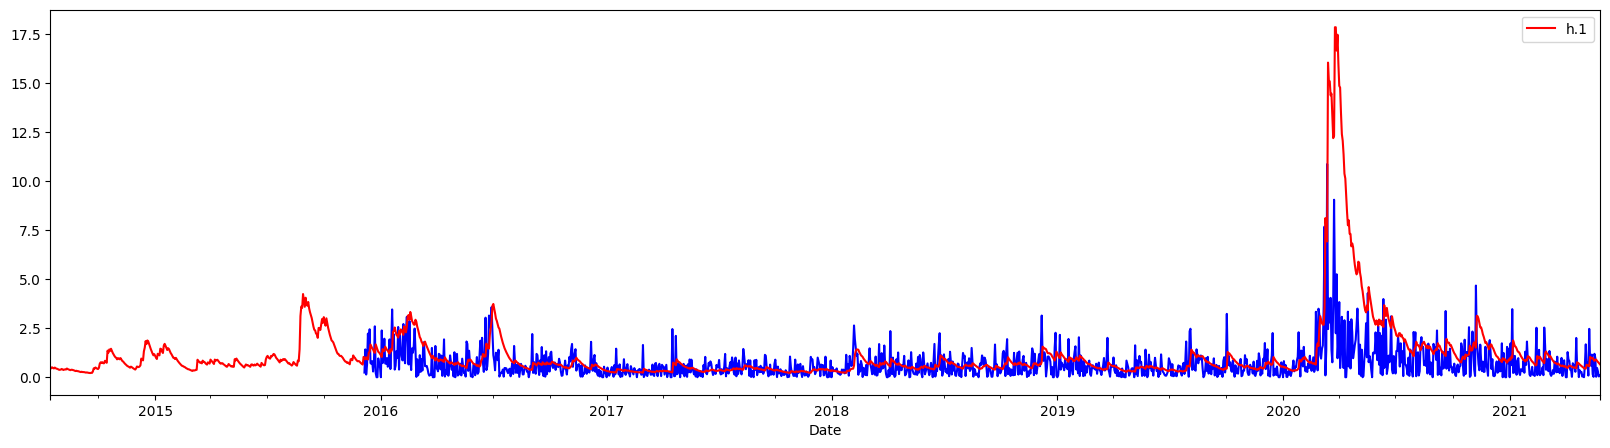

In [50]:
pred_garch.residual_variance[start_date:].plot(figsize=(20,5),
                                               color='red',
                                               zorder=2)
df_test.ret_ftse.abs().plot(color='blue', zorder=1)
plt.show()

In [51]:
pred_garch = res_garch.forecast(horizon=100,
                                align='target')
pred = pd.DataFrame(pred_garch.residual_variance[-1:]) #-1 significa que empiece a partir del ultimo valor
pred

/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-28,0.630486,0.684184,0.743045,0.795992,0.847375,0.918394,0.916838,0.862555,0.932631,1.004968,...,1.136606,1.1703,1.208345,1.254072,1.301474,1.311306,1.339249,1.394794,1.435791,1.447139


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp34ewwf67/8rzqcd4j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp34ewwf67/9a0mnofr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85398', 'data', 'file=/tmp/tmp34ewwf67/8rzqcd4j.json', 'init=/tmp/tmp34ewwf67/9a0mnofr.json', 'output', 'file=/tmp/tmp34ewwf67/prophet_modelcv7wp_o7/prophet_model-20230621123126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:31:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


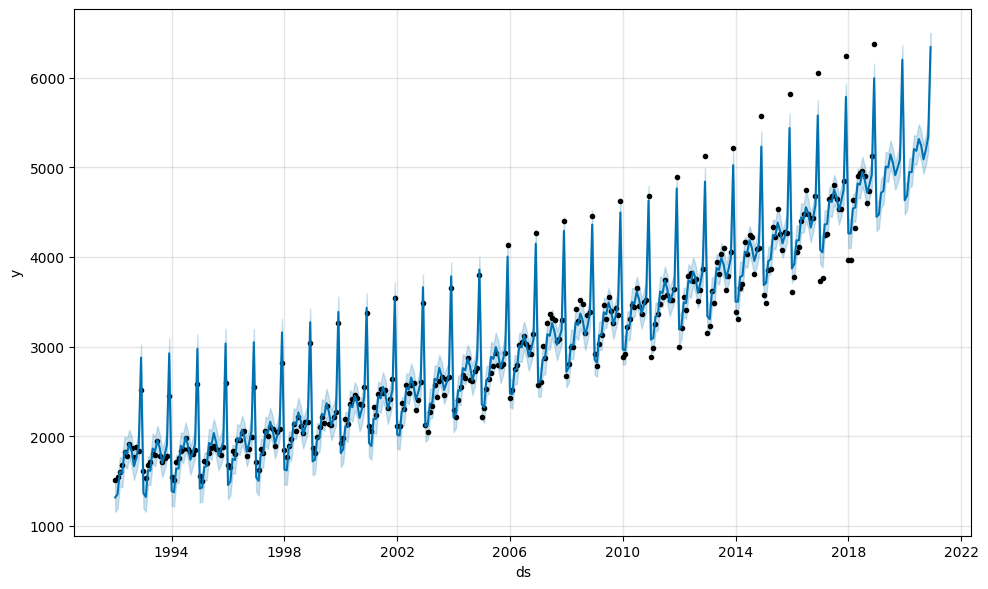

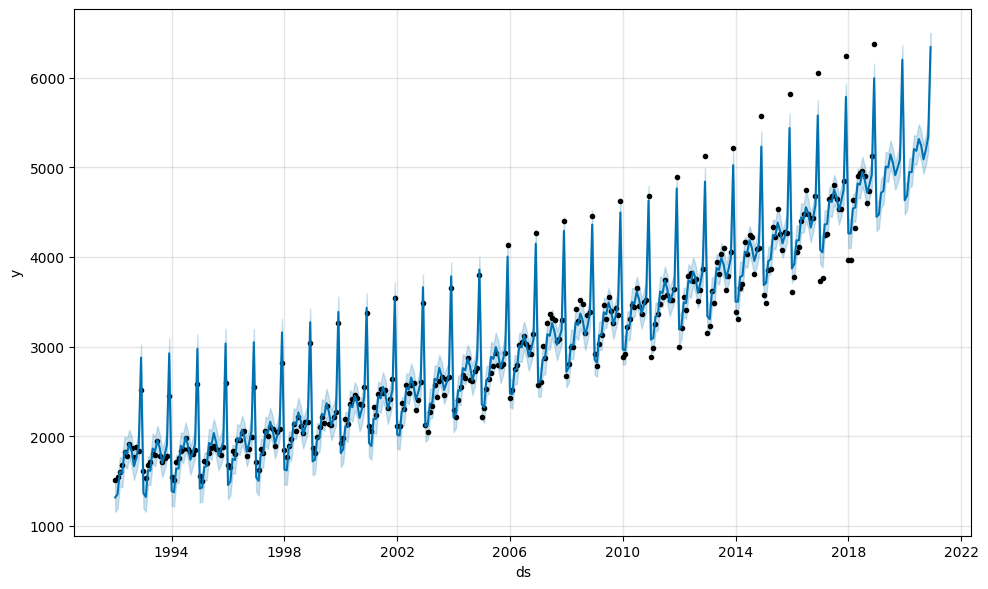

In [56]:
from prophet import Prophet

df = pd.read_csv('/content/Liquor.csv')
df.columns = ['ds', 'y'] #las variables siempre deben llamarse asi
df['ds'] = pd.to_datetime(df['ds'])

modelo = Prophet()
modelo.fit(df)

future = modelo.make_future_dataframe(periods=24,
                                      freq='MS')

forecast = modelo.predict(future)

modelo.plot(forecast)

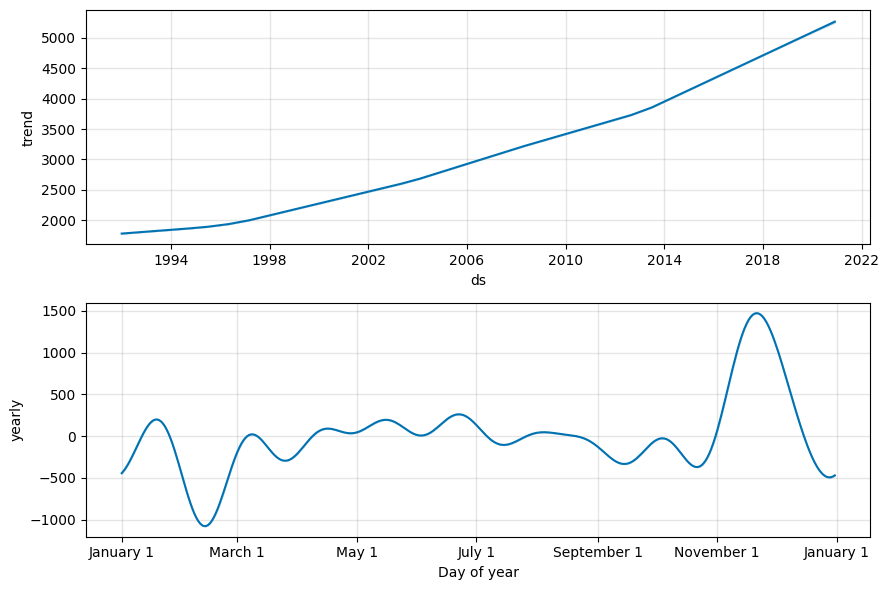

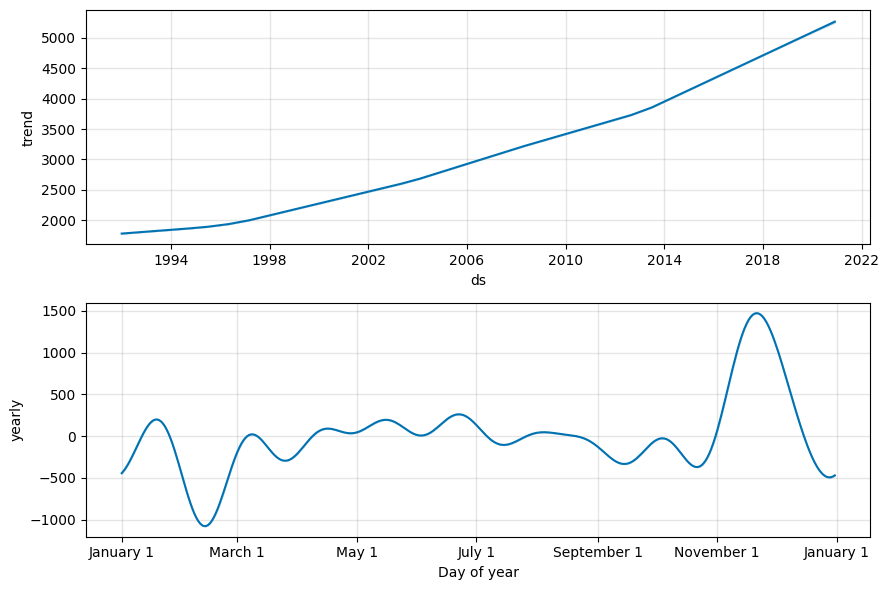

In [57]:
modelo.plot_components(forecast)

In [59]:
df = pd.read_csv('/content/covid_19.csv')

df['Date'] = pd.to_datetime(df.Date)
df.Date.nunique() #cantidad de unicos

188

In [61]:
total = df.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
total.head()

<ipython-input-61-1f7512560e97>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total = df.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [64]:
df_prophet = total.rename(columns={'Date':'ds',
                                   'Confirmed':'y'})

m = Prophet(interval_width=0.95) #95% de confianza
model = m.fit(df_prophet)
model.seasonalities #info del modelo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp34ewwf67/t0ztktld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp34ewwf67/hj7lf7o5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17292', 'data', 'file=/tmp/tmp34ewwf67/t0ztktld.json', 'init=/tmp/tmp34ewwf67/hj7lf7o5.json', 'output', 'file=/tmp/tmp34ewwf67/prophet_modelik9bhbs2/prophet_model-20230621124741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:47:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [69]:
future_global = model.make_future_dataframe(periods=90,
                                            freq='D') #dias
prediction = model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.062204e+04,-1.801051e+05,1.289325e+05,-1.062204e+04,-1.062204e+04,-11022.919838,-11022.919838,-11022.919838,-11022.919838,-11022.919838,-11022.919838,0.0,0.0,0.0,-2.164495e+04
1,2020-01-23,-7.870816e+03,-1.810050e+05,1.375529e+05,-7.870816e+03,-7.870816e+03,-1082.195992,-1082.195992,-1082.195992,-1082.195992,-1082.195992,-1082.195992,0.0,0.0,0.0,-8.953012e+03
2,2020-01-24,-5.119598e+03,-1.577520e+05,1.596457e+05,-5.119598e+03,-5.119598e+03,10096.194723,10096.194723,10096.194723,10096.194723,10096.194723,10096.194723,0.0,0.0,0.0,4.976597e+03
3,2020-01-25,-2.368379e+03,-1.535752e+05,1.786928e+05,-2.368379e+03,-2.368379e+03,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,0.0,0.0,0.0,1.135279e+04
4,2020-01-26,3.828396e+02,-1.568917e+05,1.623447e+05,3.828396e+02,3.828396e+02,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,0.0,0.0,0.0,7.628190e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2020-10-21,3.367626e+07,2.925964e+07,3.734354e+07,2.934783e+07,3.735686e+07,-11022.919838,-11022.919838,-11022.919838,-11022.919838,-11022.919838,-11022.919838,0.0,0.0,0.0,3.366524e+07
274,2020-10-22,3.388025e+07,2.948666e+07,3.762465e+07,2.951638e+07,3.762279e+07,-1082.195992,-1082.195992,-1082.195992,-1082.195992,-1082.195992,-1082.195992,0.0,0.0,0.0,3.387917e+07
275,2020-10-23,3.408424e+07,2.969372e+07,3.790302e+07,2.968515e+07,3.786058e+07,10096.194723,10096.194723,10096.194723,10096.194723,10096.194723,10096.194723,0.0,0.0,0.0,3.409434e+07
276,2020-10-24,3.428823e+07,2.981876e+07,3.809751e+07,2.982868e+07,3.815390e+07,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,0.0,0.0,0.0,3.430195e+07


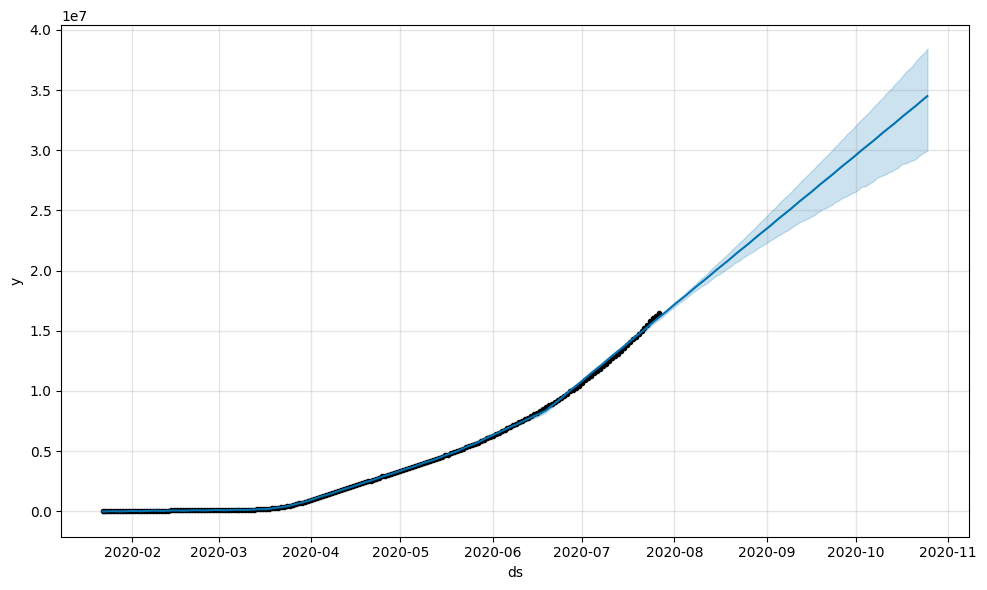

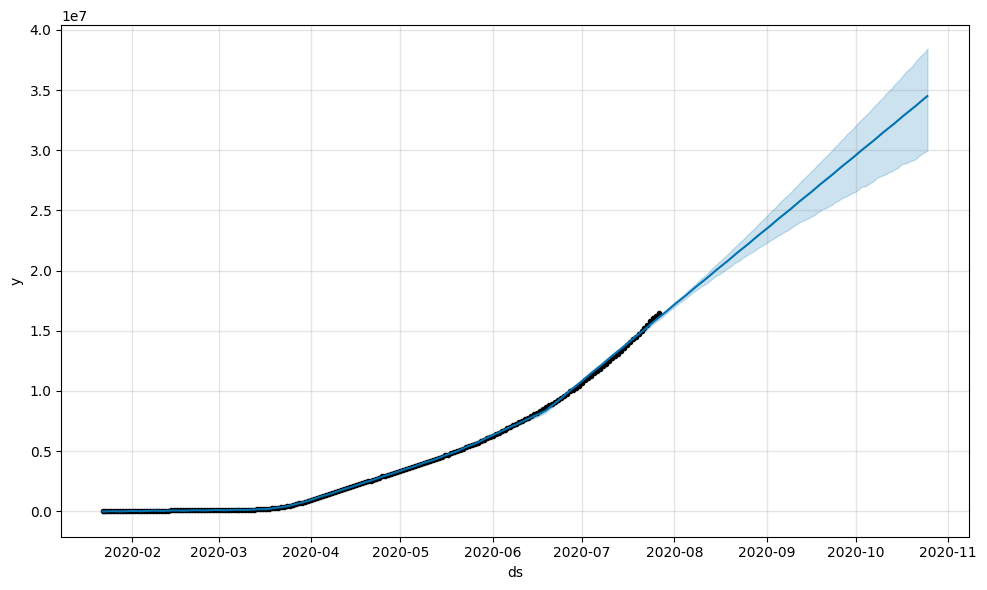

In [70]:
model.plot(prediction)

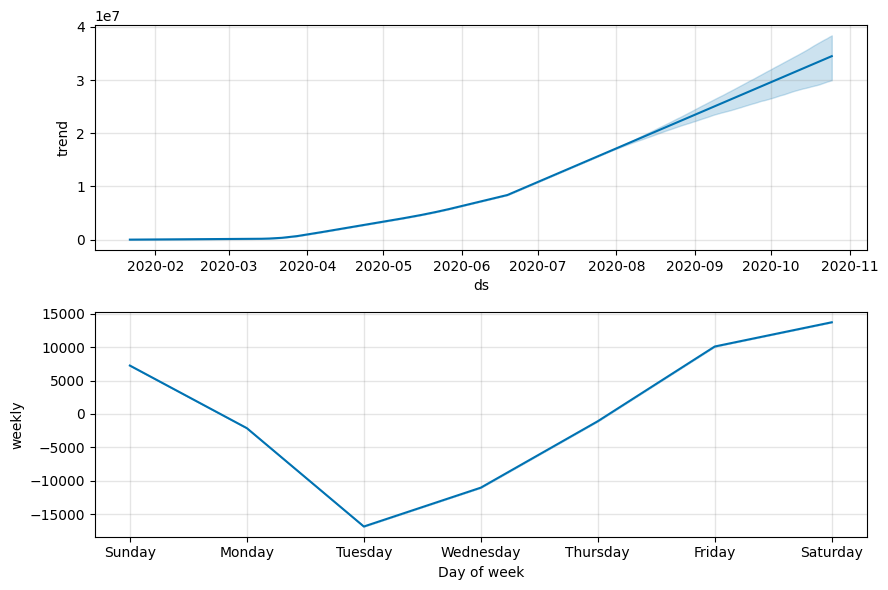

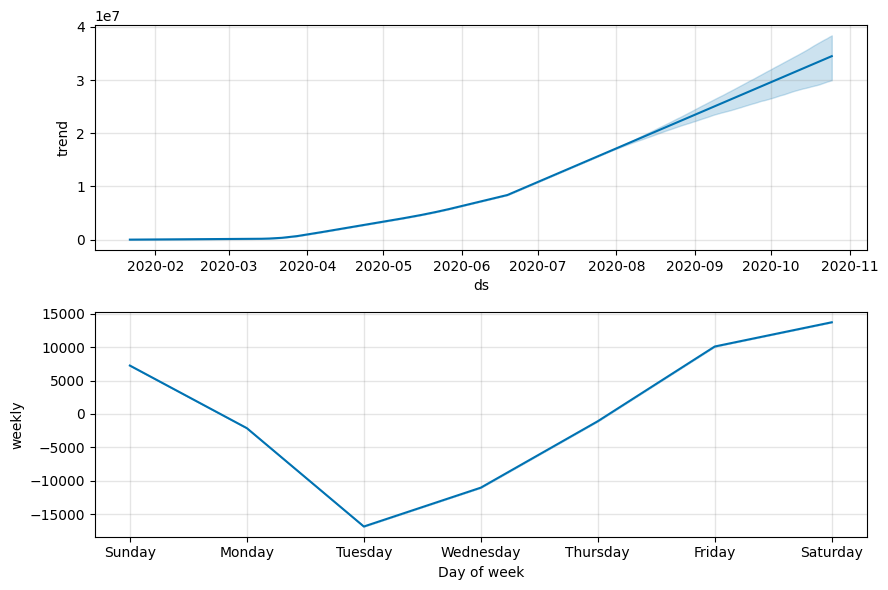

In [71]:
model.plot_components(prediction)

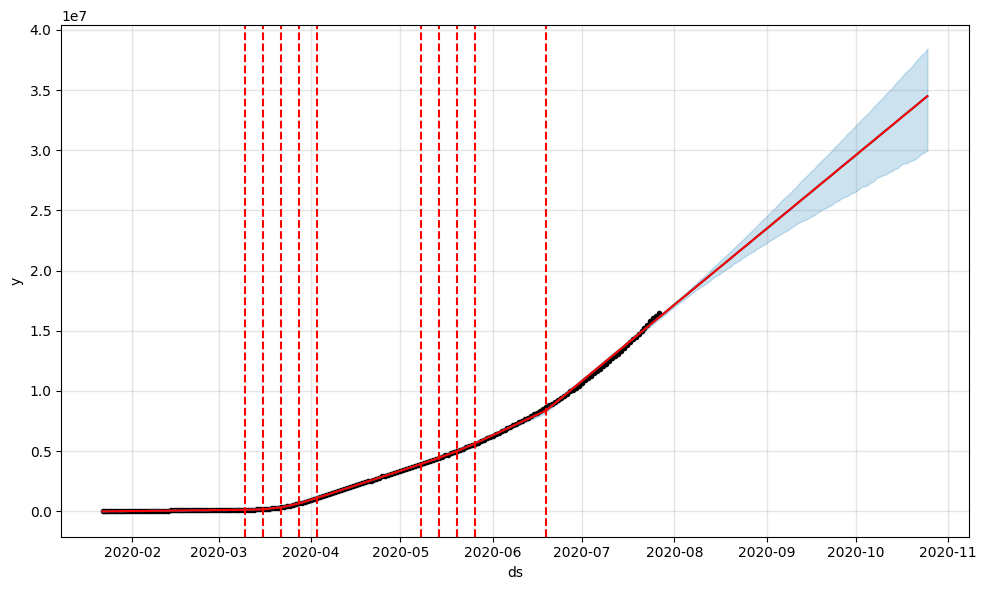

In [72]:
from prophet.plot import add_changepoints_to_plot

#identificar cuando ha cambiado la tendencia

fig = model.plot(prediction)

a = add_changepoints_to_plot(fig.gca(),
                             model,
                             prediction)

In [75]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model,
                         horizon='30 days',
                         period='15 days',
                         initial='90 days')

df_cv.head()

INFO:prophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp34ewwf67/e9xgpnv1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp34ewwf67/0c41dz8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64400', 'data', 'file=/tmp/tmp34ewwf67/e9xgpnv1.json', 'init=/tmp/tmp34ewwf67/0c41dz8i.json', 'output', 'file=/tmp/tmp34ewwf67/prophet_model48oguyd1/prophet_model-20230621130119.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:01:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:01:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp34ewwf67/lsetqe2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp34ewwf67/66869hx0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201065e+06,3.193787e+06,3.209063e+06,3185195,2020-04-28
1,2020-04-30,3.285434e+06,3.273066e+06,3.295851e+06,3268876,2020-04-28
2,2020-05-01,3.369641e+06,3.353180e+06,3.387299e+06,3355922,2020-04-28
3,2020-05-02,3.450903e+06,3.425611e+06,3.476974e+06,3437608,2020-04-28
4,2020-05-03,3.530367e+06,3.496097e+06,3.565787e+06,3515244,2020-04-28


In [76]:
from prophet.diagnostics import performance_metrics

df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.718205e+10,164869.788326,129148.413080,0.016867,0.017636,0.017049,0.066667
1,4 days,3.766143e+10,194065.526946,151327.610374,0.019327,0.022444,0.019572,0.133333
2,5 days,5.164722e+10,227260.247119,175148.479629,0.021776,0.025754,0.022095,0.200000
3,6 days,6.930725e+10,263262.710130,202121.176198,0.024553,0.026749,0.024964,0.200000
4,7 days,9.004918e+10,300081.957380,232463.774916,0.027835,0.031307,0.028360,0.200000


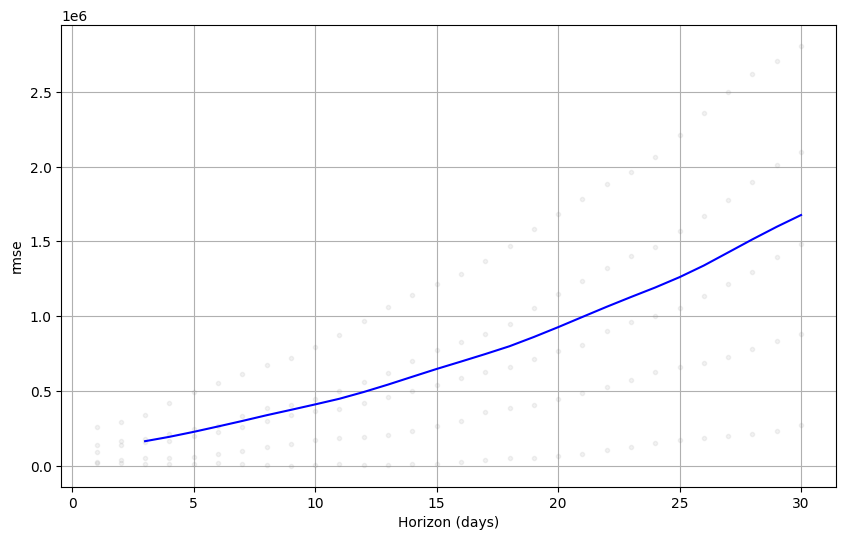

In [77]:
from prophet.plot import plot_cross_validation_metric

df_performance = plot_cross_validation_metric(df_cv,
                                              metric='rmse')

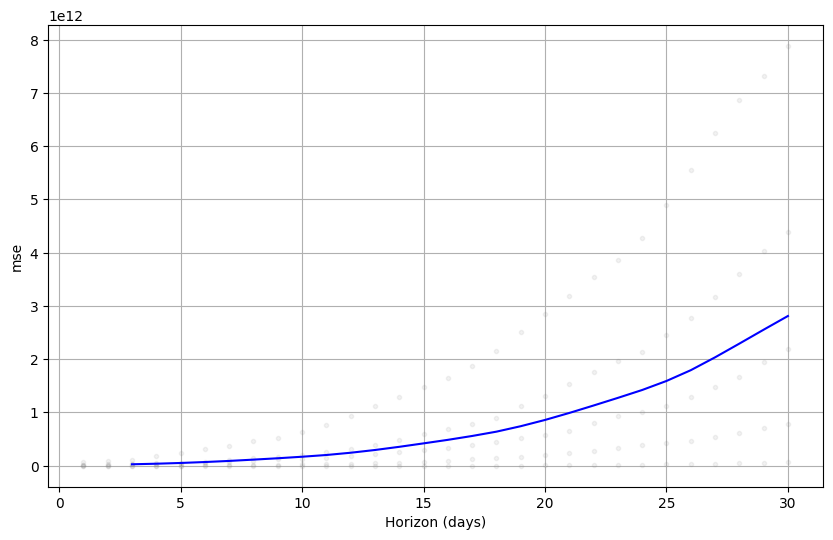

In [78]:
df_performance = plot_cross_validation_metric(df_cv,
                                              metric='mse')

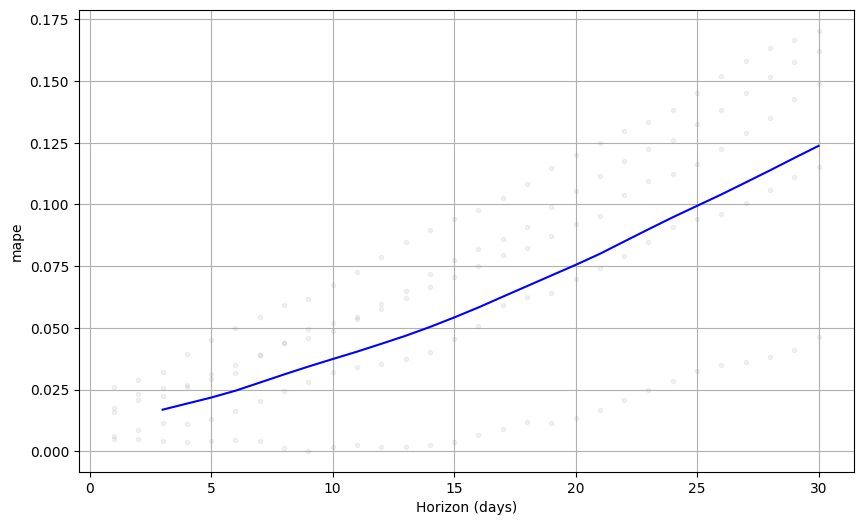

In [79]:
df_performance = plot_cross_validation_metric(df_cv,
                                              metric='mape')